In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('energy_consumption_log.csv')
df.head()

,Run,File,Energy_pkg_Joules,Energy_psys_Joules,Time_elapsed_seconds,Memory_used_kb
0,1,SVM.py,21.61,31.13,0:00.64,114588
1,2,SVM.py,20.73,29.98,0:00.62,114976
2,3,SVM.py,19.40,28.14,0:00.59,114888
3,4,SVM.py,22.49,32.79,0:00.70,114932
4,5,SVM.py,20.76,30.32,0:00.65,114812


In [15]:
df = pd.read_csv('energy_consumption_log.csv')

df['Algorithm'] = df['File'].apply(lambda x: x.split('.')[0])
df['Language'] = df['File'].apply(lambda x: 'Python' if x.endswith('.py') else 'R')

df['Time_elapsed_seconds'] = df['Time_elapsed_seconds'].apply(lambda x: float(x.split(':')[1]))

df.head()

,Run,File,Energy_pkg_Joules,Energy_psys_Joules,Time_elapsed_seconds,Memory_used_kb,Algorithm,Language
0,1,SVM.py,21.61,31.13,0.64,114588,SVM,Python
1,2,SVM.py,20.73,29.98,0.62,114976,SVM,Python
2,3,SVM.py,19.40,28.14,0.59,114888,SVM,Python
3,4,SVM.py,22.49,32.79,0.70,114932,SVM,Python
4,5,SVM.py,20.76,30.32,0.65,114812,SVM,Python


In [16]:
mean_df = df.groupby(['Algorithm', 'Language']).agg({
    'Energy_pkg_Joules': 'mean',
    'Energy_psys_Joules': 'mean',
    'Time_elapsed_seconds': 'mean',
    'Memory_used_kb': 'mean'
}).reset_index()

mean_df.head()

,Algorithm,Language,Energy_pkg_Joules,Energy_psys_Joules,Time_elapsed_seconds,Memory_used_kb
0,KMC,Python,15.2402,27.0750,0.9806,160471.20
1,KMC,R,28.6816,49.8566,1.9024,263044.88
2,KNN,Python,11.0754,19.7514,0.7628,117580.00
3,KNN,R,22.2596,39.7924,1.5872,228488.48
4,LR,Python,15.9962,27.0260,0.8662,144060.80


In [17]:
std_df = df.groupby(['Algorithm', 'Language']).agg({
    'Energy_pkg_Joules': 'std',
    'Energy_psys_Joules': 'std',
    'Time_elapsed_seconds': 'std',
    'Memory_used_kb': 'std'
}).reset_index()

std_df

,Algorithm,Language,Energy_pkg_Joules,Energy_psys_Joules,Time_elapsed_seconds,Memory_used_kb
0,KMC,Python,2.938375,3.577615,0.120109,209.164714
1,KMC,R,4.449151,5.731955,0.088607,256.744186
2,KNN,Python,1.585910,2.333324,0.028287,271.929162
3,KNN,R,1.849278,3.767298,0.103333,118.864395
4,LR,Python,3.841172,3.956658,0.140159,344.073082
5,LR,R,5.307609,7.709126,0.103705,171.344913
6,NB,Python,0.679256,1.078136,0.036483,241.065675
7,NB,R,0.462145,0.903552,0.040569,130.609647
8,RF,Python,2.081440,1.833810,0.111264,254.089825
9,RF,R,2.444652,5.299728,0.158961,108.195560


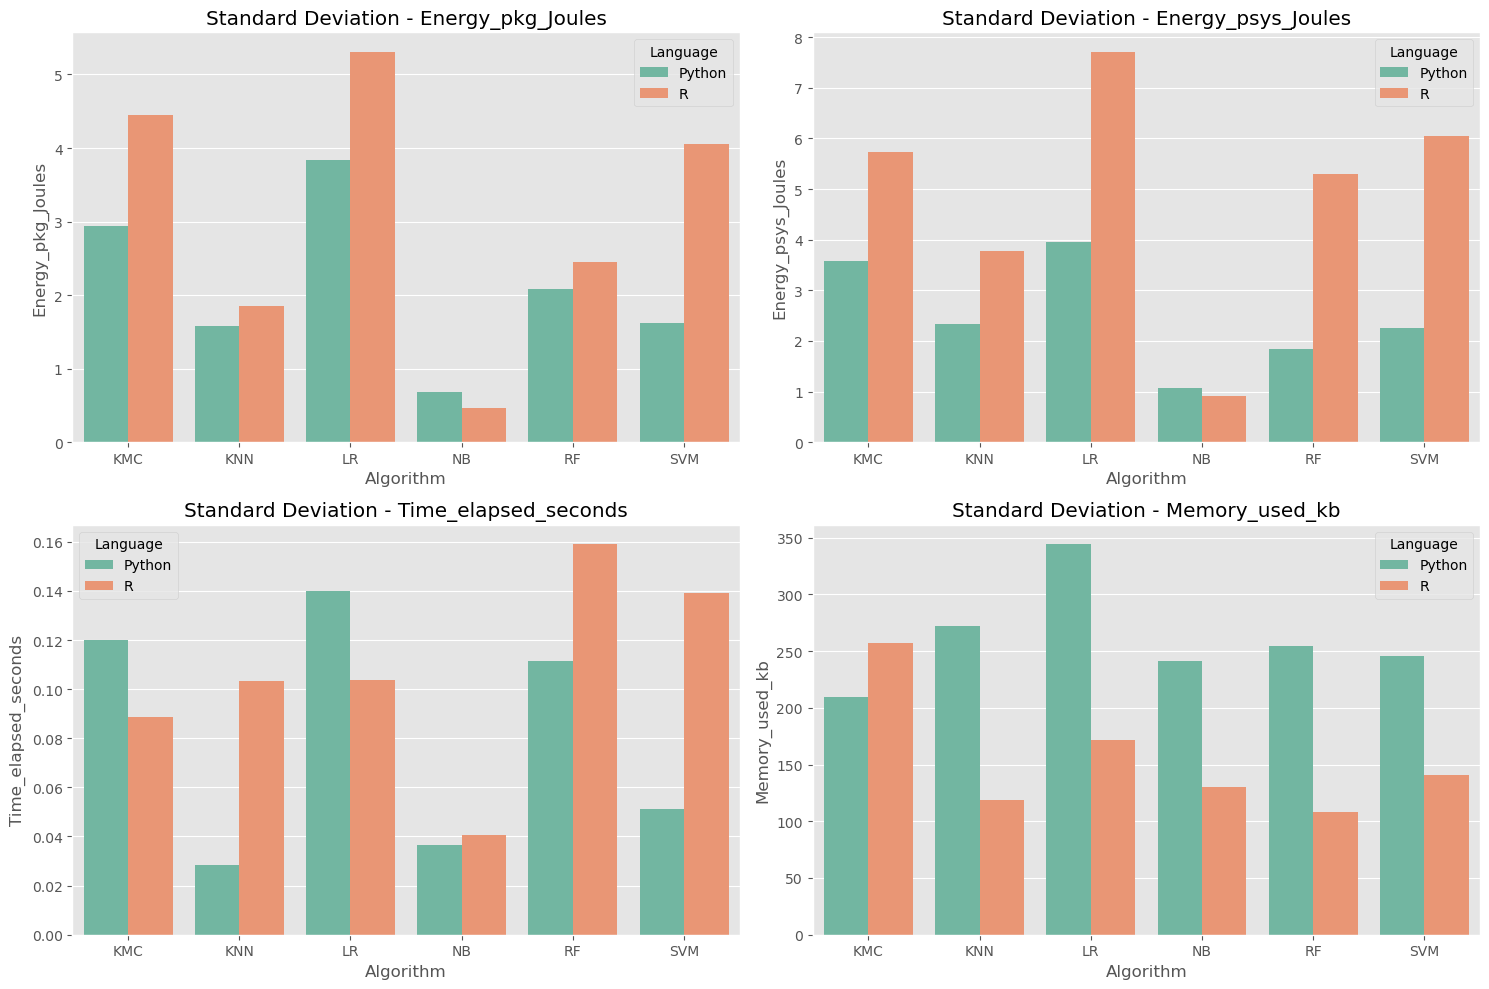

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.barplot(x='Algorithm', y='Energy_pkg_Joules', hue='Language', data=std_df, ax=ax[0, 0])
ax[0, 0].set_title('Standard Deviation - Energy_pkg_Joules')

sns.barplot(x='Algorithm', y='Energy_psys_Joules', hue='Language', data=std_df, ax=ax[0, 1])
ax[0, 1].set_title('Standard Deviation - Energy_psys_Joules')

sns.barplot(x='Algorithm', y='Time_elapsed_seconds', hue='Language', data=std_df, ax=ax[1, 0])
ax[1, 0].set_title('Standard Deviation - Time_elapsed_seconds')

sns.barplot(x='Algorithm', y='Memory_used_kb', hue='Language', data=std_df, ax=ax[1, 1])
ax[1, 1].set_title('Standard Deviation - Memory_used_kb')

plt.tight_layout()
plt.show()

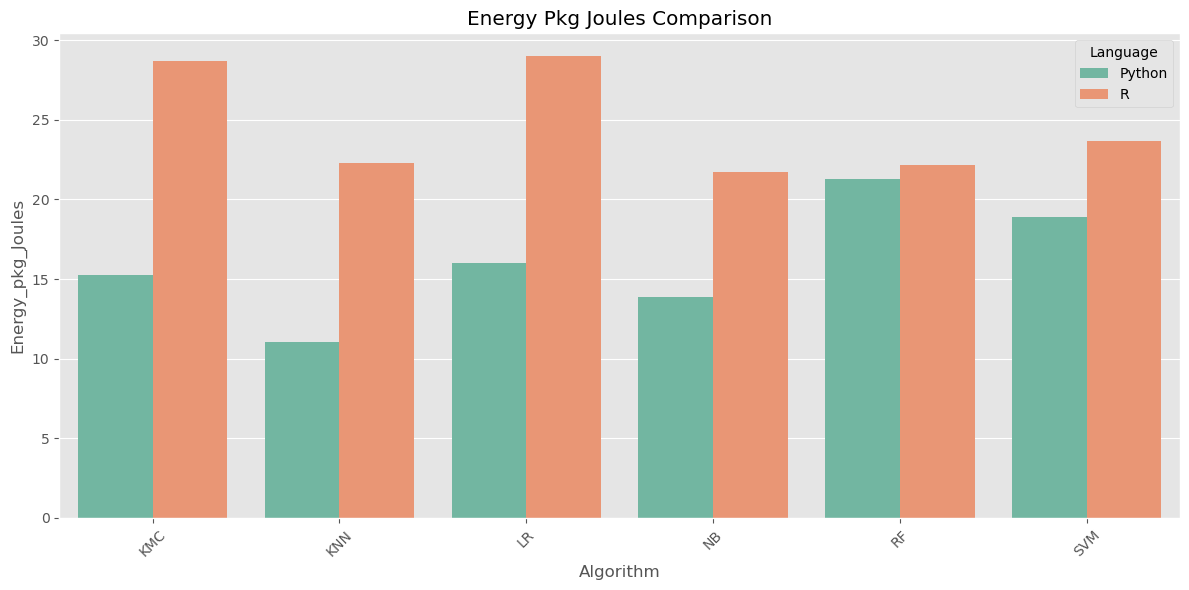

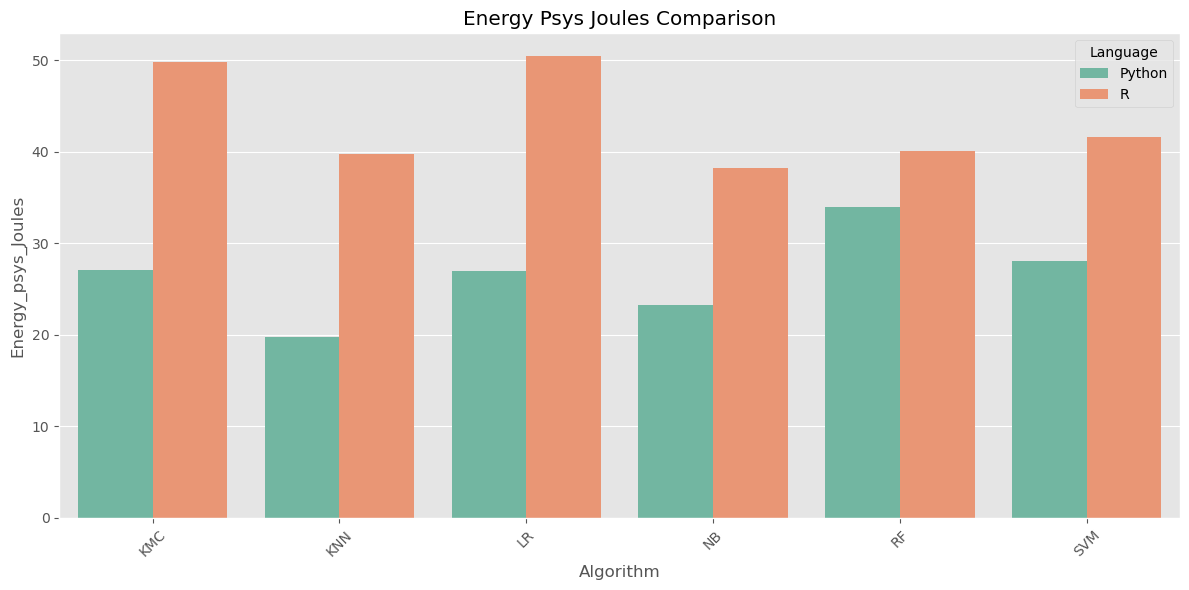

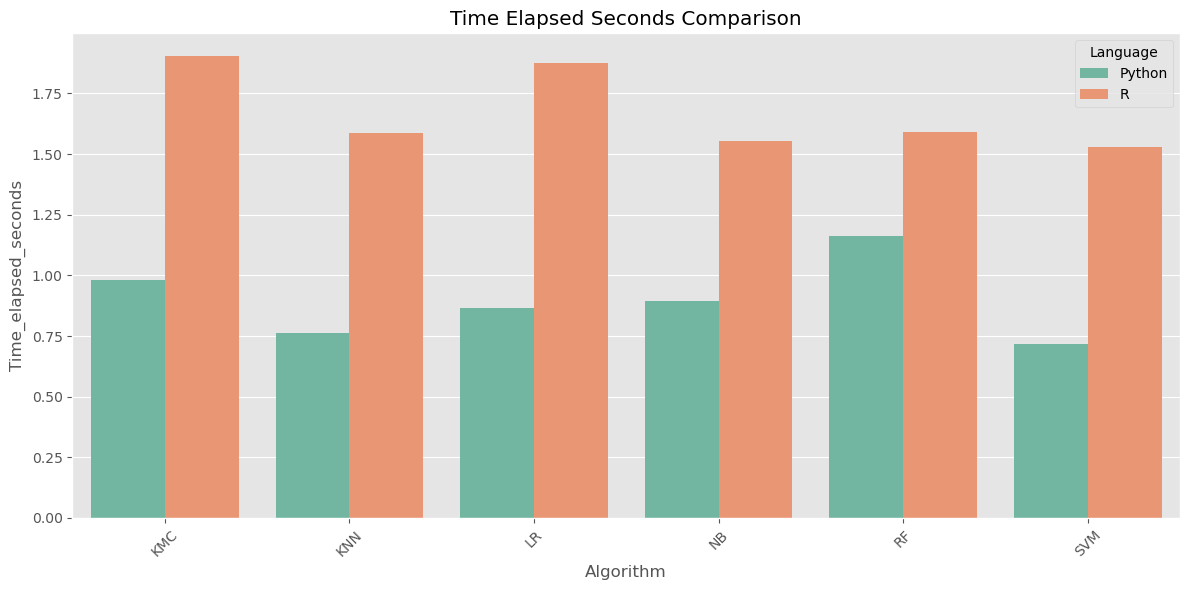

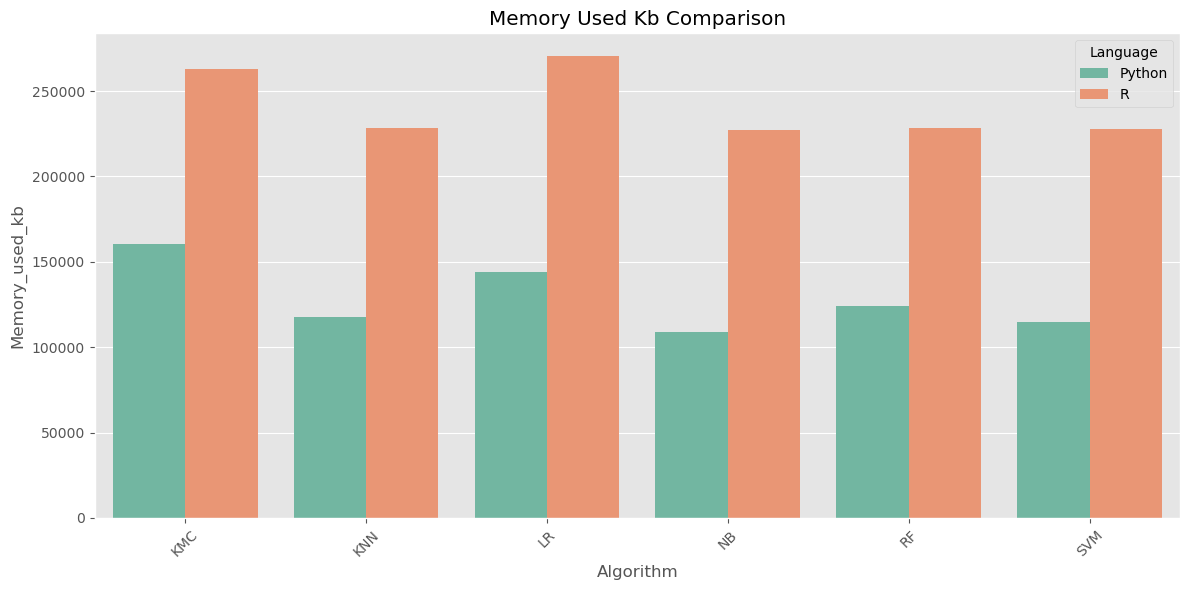

In [19]:
plt.style.use('ggplot')
sns.set_palette("Set2")

metrics = ['Energy_pkg_Joules', 'Energy_psys_Joules', 'Time_elapsed_seconds', 'Memory_used_kb']
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Algorithm', y=metric, hue='Language', data=mean_df)
    plt.title(f'{metric.replace("_", " ").title()} Comparison')
    plt.ylabel(metric)
    plt.xlabel('Algorithm')
    plt.xticks(rotation=45)
    plt.legend(title='Language')
    plt.tight_layout()
    plt.show()

In [20]:
normalized_data = []
for algo in mean_df['Algorithm'].unique():
    algo_data = mean_df[mean_df['Algorithm'] == algo]
    for metric in metrics:
        python_value = algo_data[algo_data['Language'] == 'Python'][metric].values[0]
        r_value = algo_data[algo_data['Language'] == 'R'][metric].values[0]
        min_value = min(python_value, r_value)
        normalized_data.append({
            'Algorithm': algo,
            'Metric': metric,
            'Python': python_value / min_value,
            'R': r_value / min_value
        })

normalized_df = pd.DataFrame(normalized_data)

normalized_df.to_csv('normalized_results.csv', index=False)